OBJETIVO DO PROJETO:
Criar modelo de ML que, utilizando caracteristicas celulares de imagens de biopsia, classifique automaticamente os tumores como benignos e malignos.

In [ ]:
#importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

**1.  COLETA E PREPARAÇÃO DE DADOS**

In [ ]:
#concepção dos dados
#carregar a base de dados do cancer de mama diretamente da biblioteca sklearn
data = load_breast_cancer()

#converter os dados em dataframe p facilitar a manipulação
#o df tera as caracteristicas(features) como colunas e o diagnostico (maligno/benigno) como a variavel alvo
df = pd.DataFrame(data.data, columns=data.feature_names)

#adiciona uma coluna "diagnosis" ao df, q contem o rotulo de diagnostico (0 -> maligno, 1 -> benigno)
df['diagnosis'] = data.target

#mapeia 0 p maligno e 1 p benigno na coluna 'diagnosis' p facilitar compreensão
df['diagnosis'] = df['diagnosis'].map({0: 'maligno', 1: 'benigno'})

#exibe as primeiras linhas do df p ter visao geral dos dados
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

**2. MODELAGEM DE DADOS E TREINO**

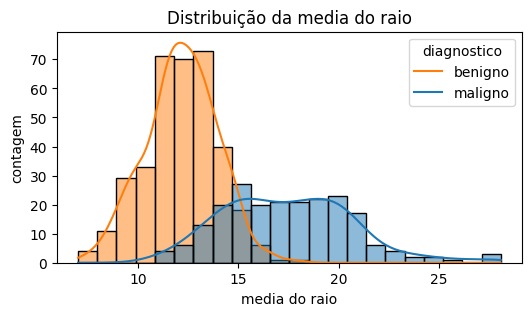

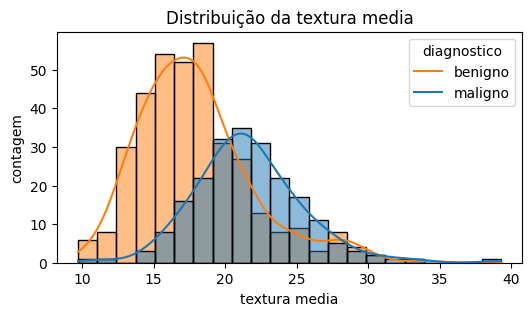

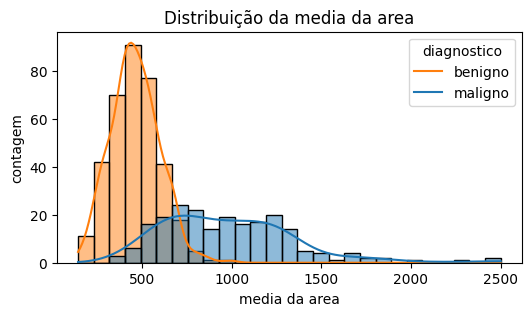

In [ ]:
#selecionar algumas features p visualizacao
features_to_plot = ['mean radius', 'mean texture', 'mean area']

#gerar graficos d distribuição p cada uma das features selecionadas
for feature  in features_to_plot:
  plt.figure(figsize=(6, 3))

  #plotar as distribuicoes das carcteristicas separadas por diagnostico
  sns.histplot(df, x=feature, hue='diagnosis', kde=True)

  #ajuste dos titulos em portugues
  if "radius" in feature:
    titulo = "media do raio"
    eixo_x = "media do raio"
  elif "texture" in feature:
    titulo = "textura media"
    eixo_x = "textura media"
  elif "area" in feature:
    titulo = "media da area"
    eixo_x = "media da area"

  #configurar o titulo e os rotulos dos eixo
  plt.title(f'Distribuição da {titulo}')
  plt.xlabel(eixo_x)
  plt.ylabel("contagem")

  #exibir a legenda q diferencia entre os diagnosticos
  plt.legend(title="diagnostico", labels=['benigno', 'maligno'])

  #exibir o grafico
  plt.show()

In [ ]:
#pre-processamento dos dados
#separar as variaveis (features) da variavel alvo (diagnostico)
X = df.drop('diagnosis', axis=1) # X contem todas as colunas exceto a de diagnostico
y = df['diagnosis'] # y contem apenas a coluna de diagnostico

#dividir os dados em conjs de treino e teste
#o conj de treino sera usado p treinar o modelo, o de teste p avaliar o desempenho
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#criar modelo random forest
clf = RandomForestClassifier(
    n_estimators=100,       #100 arvores na floresta
    max_depth=10,           #limita a profundidade das arvores p evitar overfitting
    min_samples_split=5,    #um nó precisa ter no minimo 5 amostrar p ser dividido
    min_samples_leaf=2,     #cada folha precisa ter no minimo 2 amostrar
    random_state=42         #garante q os resultados sejam reprodutiveis
)

#treinar o moldeo usando os dados de treino
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

**3. APRESENTAÇÃO DE RESULTADOS**

In [ ]:
#avaliação do modelo
#fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

#exibir o relatorio de classificação q compara as previsoes (y_pred) com os rotulos reais (y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     benigno       0.95      0.98      0.97       108
     maligno       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

